In [ ]:
!wget https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip

--2024-09-05 22:39:03--  https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip
Resolving hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)... 52.95.154.94, 3.5.225.115
Connecting to hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)|52.95.154.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131852014 (126M) [application/zip]
Saving to: ‘UTKFace.zip.1’

UTKFace.zip.1       100%[===================>] 125.74M  18.1MB/s    in 8.2s    

2024-09-05 22:39:12 (15.3 MB/s) - ‘UTKFace.zip.1’ saved [131852014/131852014]



In [ ]:
!jar xf UTKFace.zip

In [ ]:
!pip install torchviz

In [ ]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import glob
import os

In [ ]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"))
print(image_paths[0])

In [ ]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"))
images = []
ages = []
genders = []
races = []

for path in image_paths:
    filename = path[8:].split("_")
    if len(filename)==4:
        images.append(np.array(Image.open(path)))
        ages.append(int(filename[0]))
        genders.append(int(filename[1]))
        races.append(int(filename[2]))

In [ ]:
dataset_dict = {
    "race_id": {0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Others"},
    "gender_id": {0: "Male", 1: "Female"}
}

In [ ]:
idx = np.random.randint(len(images))# Hint: Try 19006 for someone who's gonna yell motherfucka at you!

plt.imshow(images[idx])
plt.show()

print("Age: "+str(ages[idx]))
print("Gender: "+str(dataset_dict['gender_id'][genders[idx]]))
print("Race: "+str(dataset_dict['race_id'][races[idx]]))

In [ ]:
min_age_value, max_age_value = min(ages), max(ages)
log_age_values = np.log10(ages)
max_age_log_value = log_age_values.max()

print('MAX AGE VALUE', max_age_value)
print('MIN AGE VALUE', min_age_value)
print('MAX AGE LOG VALUE', max_age_log_value)

In [ ]:
def get_normalized_age_value(original_age_value):
    return (original_age_value - min_age_value)/(max_age_value - min_age_value)

def get_log_age_value(original_age_value):
    return np.log10(original_age_value)/max_age_log_value

def get_original_age_from_log_value(log_age_value):
    return np.exp(log_age_value) * max_age_log_value

def get_original_age_value(normalized_age_value):
    return normalized_age_value * (max_age_value - min_age_value) + min_age_value

In [ ]:
import seaborn as sns
import pandas as pd

d = {'age': ages, 'gender': genders, 'race': races}
df = pd.DataFrame(data=d)

In [ ]:
df.head()

,age,gender,race
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0


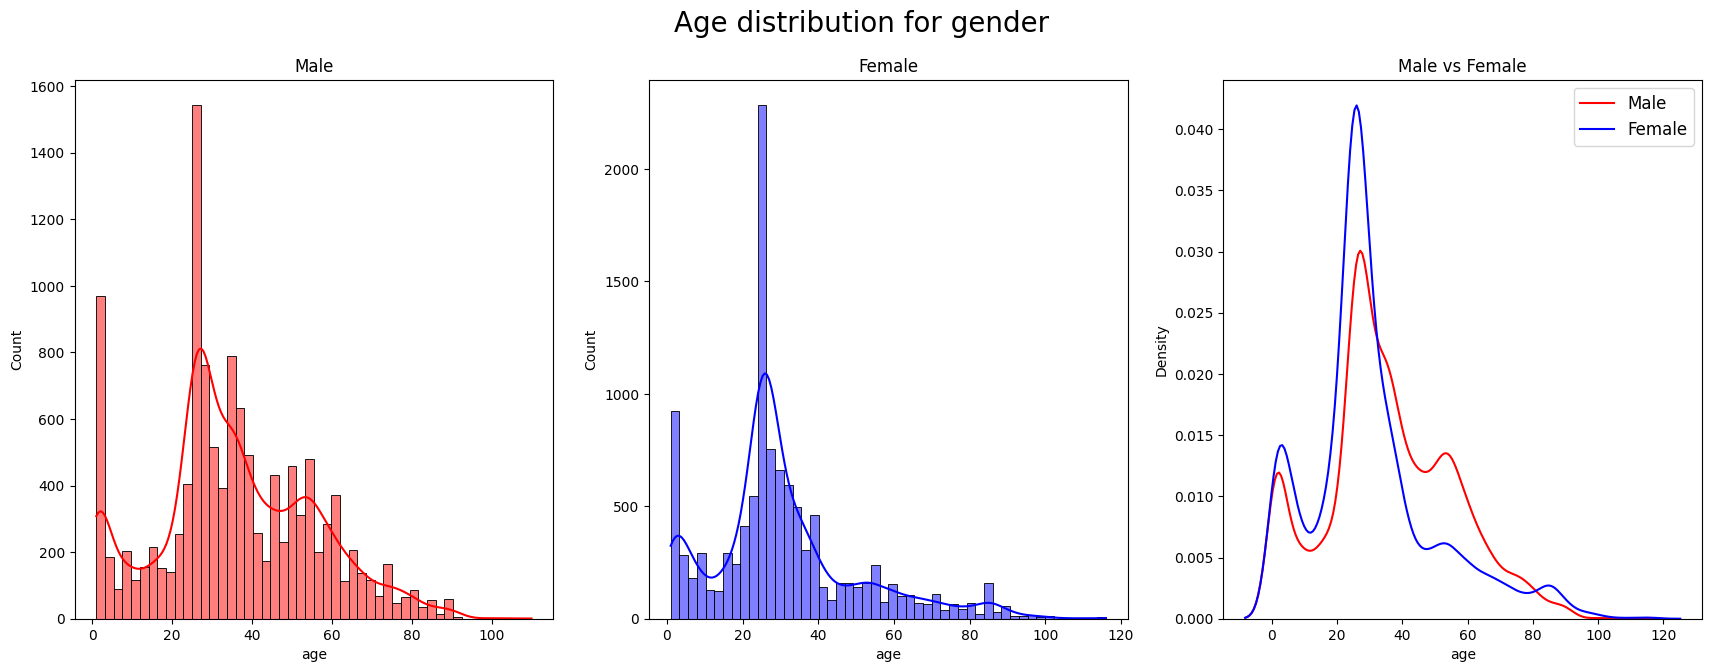

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle("Age distribution for gender", fontsize=20)

df_age_male = df.groupby("gender").get_group(0)
df_age_female = df.groupby("gender").get_group(1)

sns.histplot(data=df_age_male, x="age", kde=True, color="red", ax=ax1, bins=50)
sns.histplot(data=df_age_female, x="age", kde=True, color="blue", ax=ax2, bins=50)

ax1.set_title("Male")
ax2.set_title("Female")

sns.kdeplot(data=df_age_male, x="age", color="red", ax=ax3)
sns.kdeplot(data=df_age_female, x="age", color="blue", ax=ax3)

ax3.legend(["Male", "Female"], fontsize="large")
ax3.title.set_text("Male vs Female")

plt.show()

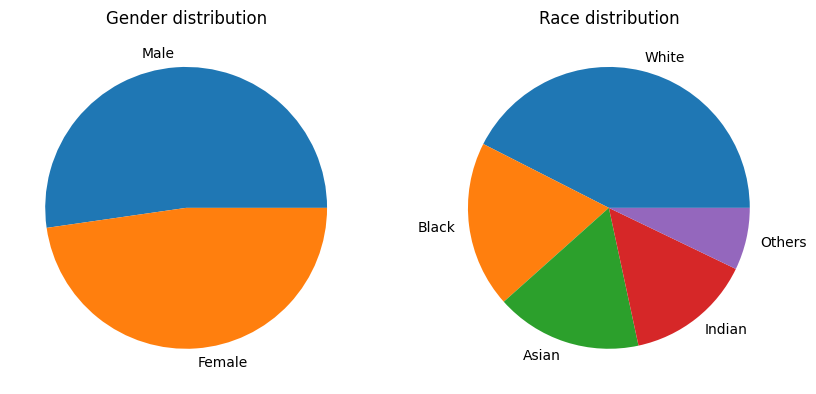

In [ ]:
pie, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,6])
df.gender.value_counts().plot(kind='pie', labels=["Male", "Female"], pctdistance=0.5, ax = ax1)
ax1.yaxis.set_visible(False)
ax1.title.set_text('Gender distribution')

df.race.value_counts().plot(kind='pie', labels=["White", "Black", "Asian", "Indian", "Others"], pctdistance=0.5, ax = ax2)
ax2.yaxis.set_visible(False)
ax2.title.set_text('Race distribution')

plt.show()

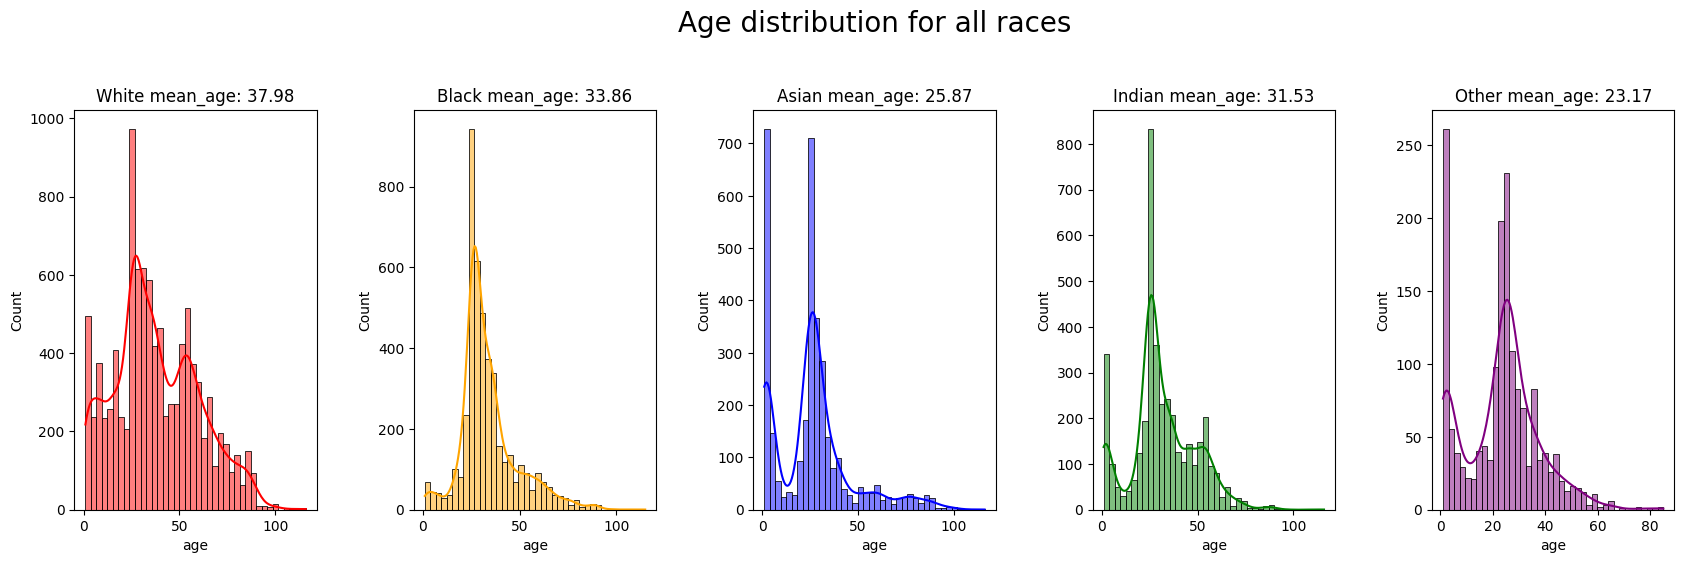

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Age distribution for all races', fontsize=20, y=1.1)
fig.tight_layout()

df_race_white = df.groupby('race').get_group(0)
sns.histplot(data=df_race_white, x="age", kde=True, color="red", ax=ax1, bins=40)
ax1.title.set_text("White mean_age: "+"%.2f" % df_race_white.mean()["age"])

df_race_black = df.groupby('race').get_group(1)
sns.histplot(data=df_race_black, x="age", kde=True, color="orange", ax=ax2, bins=40)
ax2.title.set_text("Black mean_age: "+"%.2f" % df_race_black.mean()["age"])

df_race_asian = df.groupby('race').get_group(2)
sns.histplot(data=df_race_asian, x="age", kde=True, color="blue", ax=ax3, bins=40)
ax3.title.set_text("Asian mean_age: "+"%.2f" % df_race_asian.mean()["age"])

df_race_indian = df.groupby('race').get_group(3)
sns.histplot(data=df_race_indian, x="age", kde=True, color="green", ax=ax4, bins=40)
ax4.title.set_text("Indian mean_age: "+"%.2f" % df_race_indian.mean()["age"])

df_race_other = df.groupby('race').get_group(4)
sns.histplot(data=df_race_other, x="age", kde=True, color="purple", ax=ax5, bins=40)
ax5.title.set_text("Other mean_age: "+"%.2f" % df_race_other.mean()["age"])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
class UTKFace(Dataset):
    def __init__(self, image_paths):
        # Mean and Std for ImageNet
        mean=[0.485, 0.456, 0.406] # ImageNet
        std=[0.229, 0.224, 0.225] # ImageNet

        # Define the Transforms
        self.transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(), transforms.Normalize(mean, std)])

        # Set Inputs and Labels
        self.image_paths = image_paths
        self.images = []
        self.ages = []
        self.genders = []
        self.races = []

        for path in image_paths:
            filename = path[8:].split("_")
            if len(filename)==4:
                self.images.append(path)
                self.ages.append(int(filename[0]))
                self.genders.append(int(filename[1]))
                self.races.append(int(filename[2]))

    def __len__(self):
         return len(self.images)

    def __getitem__(self, index):
        # Load an Image
        img = Image.open(self.images[index]).convert('RGB')
        # Transform it
        img = self.transform(img)

        # Get the Labels
        age = self.ages[index]
        gender = self.genders[index]
        race = self.races[index]

        # Return the sample of the dataset
        sample = {'image':img, 'age': age, 'gender': gender, 'race':race}
        return sample

In [ ]:
import torch
from torch.utils.data import random_split, DataLoader

In [ ]:
TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
num_train = round(TRAIN_SPLIT*len(image_paths))
num_val = round(VAL_SPLIT*len(image_paths))

print("No of train samples", num_train)
print("No of validation samples", num_val)

No of train samples 16595
No of validation samples 7112


In [ ]:
(train_dataset, valid_dataset) = random_split(image_paths, [num_train, num_val], generator=torch.Generator().manual_seed(42))

In [ ]:
BATCH_SIZE = 64

train_dataloader = DataLoader(UTKFace(train_dataset), shuffle=True, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(UTKFace(valid_dataset), shuffle=False, batch_size=BATCH_SIZE)

train_steps = len(train_dataloader.dataset) // BATCH_SIZE
val_steps = len(val_dataloader.dataset) // BATCH_SIZE

In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)
  plt.show()

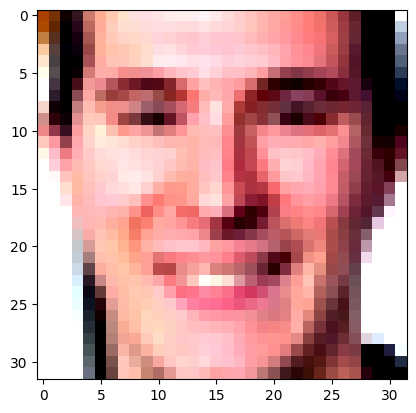

30
0.25217391304347825
Male
White


In [ ]:
sample = next(iter(train_dataloader))
imshow(sample["image"][0])
plt.show()

print(sample["age"][0].item())
print(get_normalized_age_value(sample["age"][0].item()))

print(dataset_dict['gender_id'][sample["gender"][0].item()])
print(dataset_dict['race_id'][sample["race"][0].item()])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50, resnet101, resnet18, resnet34

In [ ]:
from collections import OrderedDict

In [ ]:
class HydraNetModified(nn.Module):
    def __init__(self, net):
        super(HydraNetModified, self).__init__()
        self.net = net
        self.n_features = self.net.fc.in_features
        self.net.fc = nn.Identity()
        self.net.fc1 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features,self.n_features)),('relu1', nn.ReLU()),('final', nn.Linear(self.n_features, 1))]))
        self.net.fc2 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features,self.n_features)),('relu1', nn.ReLU()),('final', nn.Linear(self.n_features, 1))]))
        self.net.fc3 = nn.Sequential(OrderedDict([('linear', nn.Linear(self.n_features,self.n_features)),('relu1', nn.ReLU()),('final', nn.Linear(self.n_features, 5))]))

    def forward(self, x):
        age_head = self.net.fc1(self.net(x))
        gender_head = self.net.fc2(self.net(x))
        race_head = self.net.fc3(self.net(x))
        return age_head, gender_head, race_head

In [ ]:
net = resnet34(pretrained=True)
model = HydraNetModified(net)
model.to(device=device)

race_loss = nn.CrossEntropyLoss()
gender_loss = nn.BCELoss()
age_loss = nn.L1Loss()

lr = 1e-4
momentum = 0.09
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from torchviz import make_dot

In [ ]:
# make_dot(model(sample['image'].to(device)), params=dict(list(model.named_parameters()))).render("HydraNet", format="png")

###Train model

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
n_epochs = 100

logger = {"train_loss": list(),
          "validation_loss": list(),
          "train_gender_loss": list(),
          "train_race_loss": list(),
          "train_age_loss": list(),
          "validation_gender_loss": list(),
          "validation_race_loss": list(),
          "validation_age_loss": list(),
          }

In [ ]:
sig = nn.Sigmoid()

for epoch in range(n_epochs):
    model.train()

    total_training_loss = 0
    total_validation_loss = 0
    training_gender_loss = 0
    training_race_loss = 0
    training_age_loss = 0
    validation_gender_loss = 0
    validation_race_loss = 0
    validation_age_loss = 0

    for i, data in enumerate(train_dataloader):
        inputs = data["image"].to(device=device)
        age_label = get_normalized_age_value(data["age"]).to(device=device)
        gender_label = data["gender"].to(device=device)
        race_label = data["race"].to(device=device)

        optimizer.zero_grad()
        age_output, gender_output, race_output = model(inputs)

        loss_1 = race_loss(race_output, race_label)
        loss_2 = gender_loss(sig(gender_output), gender_label.unsqueeze(1).float())
        loss_3 = age_loss(age_output, age_label.unsqueeze(1).float())

        loss = loss_1 + loss_2 + loss_3

        loss.backward()
        optimizer.step()
        total_training_loss += loss

        training_race_loss += loss_1.item()
        training_gender_loss += loss_2.item()
        training_age_loss += loss_3.item()
    print('EPOCH ', epoch+1)
    print("Training Losses: Race: {}, Gender: {}, Age: {}".format(loss_1, loss_2, loss_3))

    with torch.no_grad():
        model.eval()

        for i, data in enumerate(val_dataloader):
            inputs = data["image"].to(device=device)
            age_label = get_normalized_age_value(data["age"]).to(device=device)
            gender_label = data["gender"].to(device=device)
            race_label =  data["race"].to(device=device)
            age_output, gender_output, race_output = model(inputs)

            loss_1 = race_loss(race_output, race_label)
            loss_2 = gender_loss(sig(gender_output), gender_label.unsqueeze(1).float())
            loss_3 = age_loss(age_output, age_label.unsqueeze(1).float())

            loss = loss_1 + loss_2 + loss_3
            total_validation_loss += loss

            validation_race_loss += loss_1.item()
            validation_gender_loss += loss_2.item()
            validation_age_loss += loss_3.item()
        print("Validation Losses: Race: {}, Gender: {}, Age: {}".format(loss_1, loss_2, loss_3))

    avgTrainLoss = total_training_loss / train_steps
    avgValLoss = total_validation_loss / val_steps

    print('Average Losses — Training: {} | Validation {}'.format(avgTrainLoss, avgValLoss))
    print()
    avgTrainGenderLoss = training_gender_loss/len(train_dataloader.dataset)
    avgTrainRaceLoss = training_race_loss/len(train_dataloader.dataset)
    avgTrainAgeLoss = training_age_loss/len(train_dataloader.dataset)

    avgValGenderLoss = validation_gender_loss/len(val_dataloader.dataset)
    avgValRaceLoss = validation_race_loss/len(val_dataloader.dataset)
    avgValAgeLoss = validation_age_loss/len(val_dataloader.dataset)

    logger["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    logger["train_gender_loss"].append(avgTrainGenderLoss)
    logger["train_race_loss"].append(avgTrainRaceLoss)
    logger["train_age_loss"].append(avgTrainAgeLoss)

    logger["validation_loss"].append(avgValLoss.cpu().detach().numpy())
    logger["validation_gender_loss"].append(avgValGenderLoss)
    logger["validation_race_loss"].append(avgValRaceLoss)
    logger["validation_age_loss"].append(avgValAgeLoss)

EPOCH  1
Training Losses: Race: 1.4573901891708374, Gender: 0.6854170560836792, Age: 0.21023370325565338
Validation Losses: Race: 1.4434417486190796, Gender: 0.7280227541923523, Age: 0.38134264945983887
Average Losses — Training: 2.4938721656799316 | Validation 2.46529221534729

EPOCH  2
Training Losses: Race: 1.2435680627822876, Gender: 0.6782220005989075, Age: 0.1610388308763504
Validation Losses: Race: 1.2670340538024902, Gender: 0.788752555847168, Age: 0.4769276976585388
Average Losses — Training: 2.3823883533477783 | Validation 2.4035089015960693

EPOCH  3
Training Losses: Race: 1.379578709602356, Gender: 0.6631304025650024, Age: 0.16173921525478363
Validation Losses: Race: 1.191585898399353, Gender: 0.7156938314437866, Age: 0.3671560287475586
Average Losses — Training: 2.338383674621582 | Validation 2.3639302253723145

EPOCH  4
Training Losses: Race: 1.665013313293457, Gender: 0.6936109662055969, Age: 0.21831795573234558
Validation Losses: Race: 1.1209672689437866, Gender: 0.7824

In [ ]:
# torch.save(model.state_dict(), "model.pth")

### Results

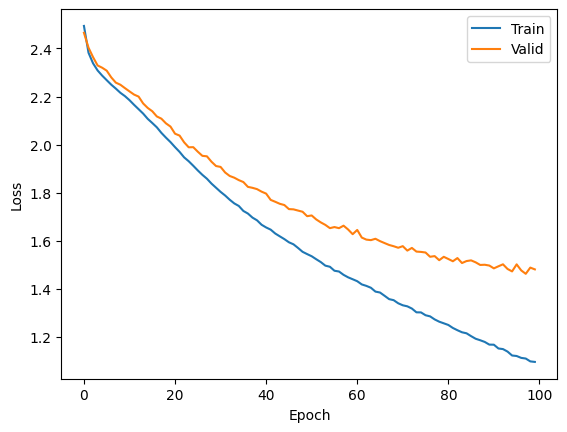

In [ ]:
plt.plot(logger["train_loss"])
plt.plot(logger["validation_loss"])
plt.legend(['Train','Valid'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

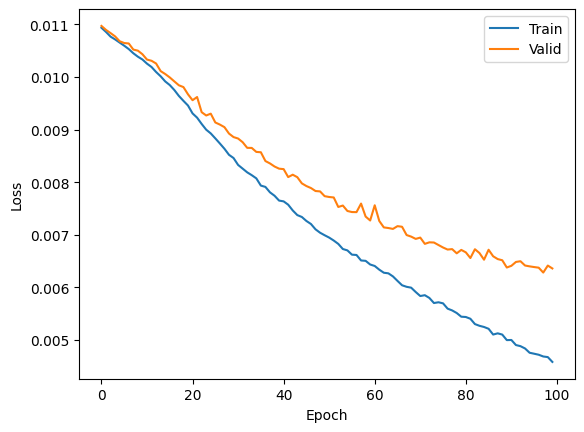

In [ ]:
plt.plot(logger["train_gender_loss"])
plt.plot(logger["validation_gender_loss"])
plt.legend(['Train','Valid'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

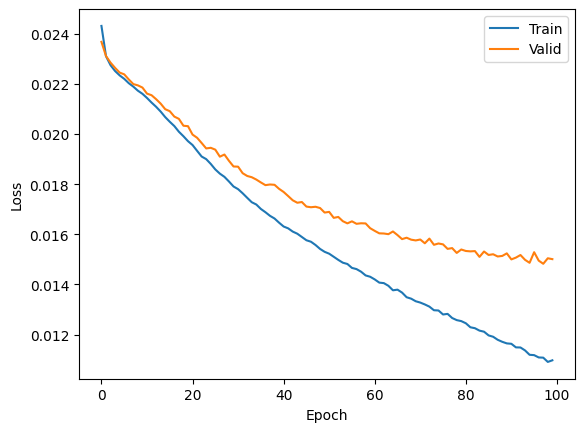

In [ ]:
plt.plot(logger["train_race_loss"])
plt.plot(logger["validation_race_loss"])
plt.legend(['Train','Valid'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

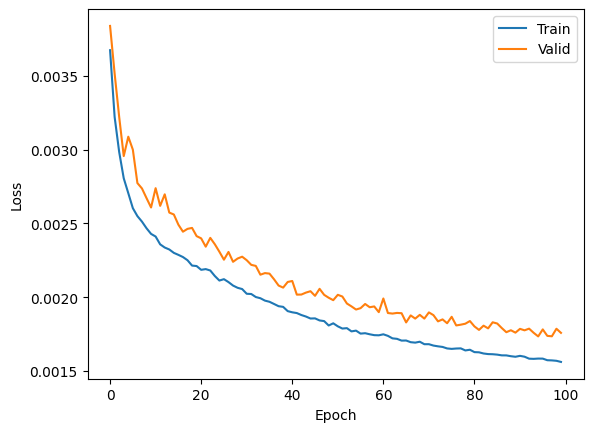

In [ ]:
plt.plot(logger["train_age_loss"])
plt.plot(logger["validation_age_loss"])
plt.legend(['Train','Valid'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

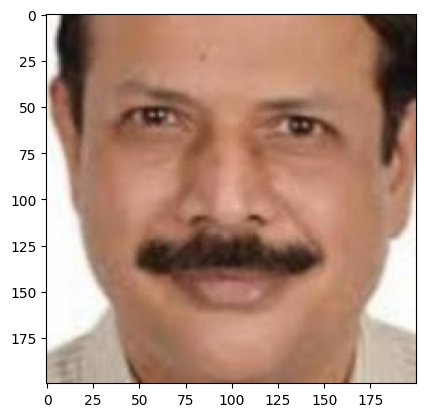

Age: 43 | Predicted: -4
Gender: Male | Predicted: male
Race: Indian | Predicted: asian




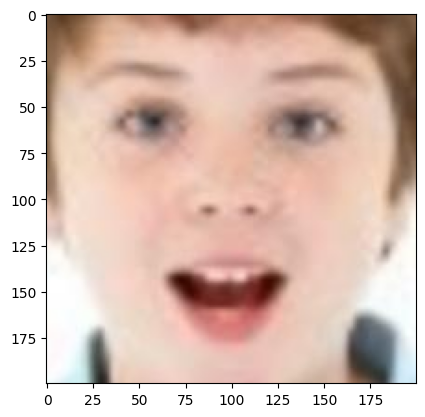

Age: 11 | Predicted: -10
Gender: Male | Predicted: male
Race: White | Predicted: asian




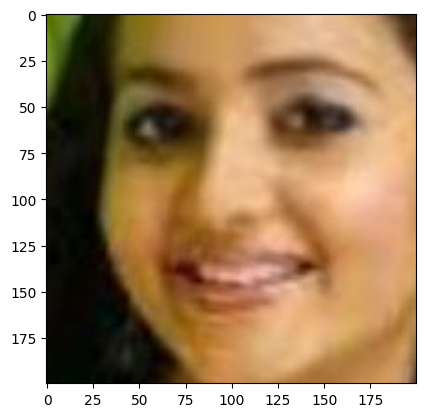

Age: 23 | Predicted: 162
Gender: Female | Predicted: female
Race: Indian | Predicted: asian




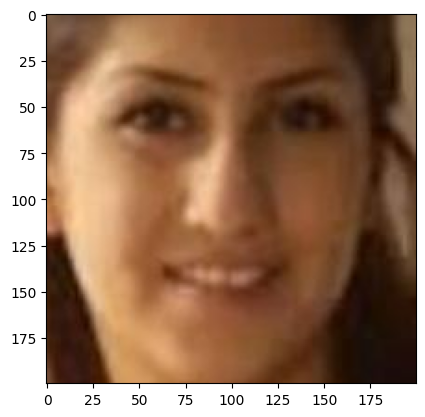

Age: 22 | Predicted: 57
Gender: Female | Predicted: male
Race: Indian | Predicted: asian




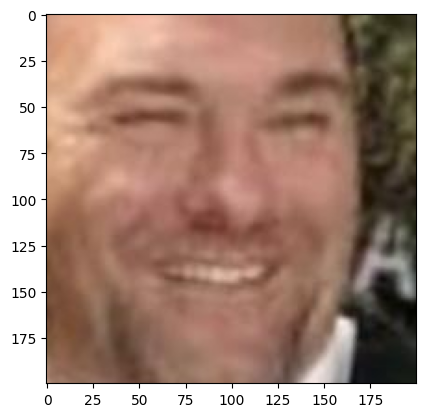

Age: 52 | Predicted: 26
Gender: Male | Predicted: male
Race: White | Predicted: asian




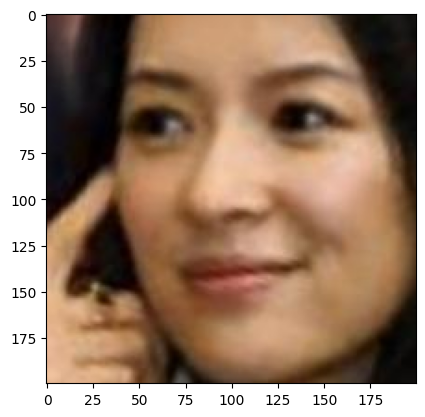

Age: 26 | Predicted: -1
Gender: Female | Predicted: male
Race: Asian | Predicted: asian




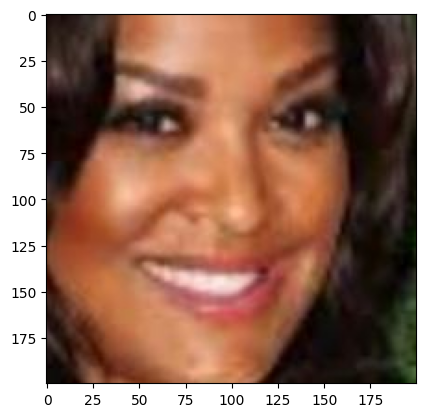

Age: 27 | Predicted: 64
Gender: Female | Predicted: male
Race: Black | Predicted: asian




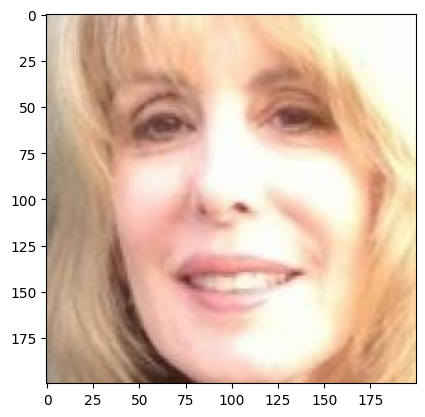

Age: 60 | Predicted: 11
Gender: Female | Predicted: male
Race: White | Predicted: asian




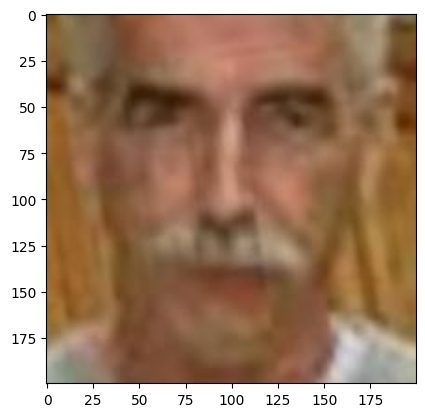

Age: 54 | Predicted: 53
Gender: Male | Predicted: male
Race: White | Predicted: asian




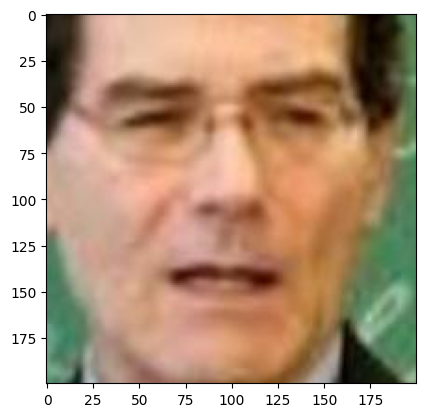

Age: 50 | Predicted: 48
Gender: Male | Predicted: male
Race: White | Predicted: asian




In [ ]:
indices = valid_dataset.indices
test_indices = indices[0:10]

for idx in test_indices:
    plt.figure()
    plt.imshow(images[idx])
    plt.show()

    image_norm = images[idx] / 255.0
    image_norm = (torch.from_numpy(image_norm).view(1, 3, image_norm.shape[0], image_norm.shape[1]).float())

    model.eval()
    age, gender, race = model(image_norm.to(device=device))

    predicted_age = int(get_original_age_value(age.squeeze(0).item()))

    print("Age:", str(ages[idx]), "| Predicted:", str(int(predicted_age)))

    sigmoid = nn.Sigmoid()
    out_gender = int(torch.round(sigmoid(gender)).item())
    gender_classes = ["male", "female"]
    print("Gender:", str(dataset_dict['gender_id'][genders[idx]]), "| Predicted:", str(gender_classes[out_gender]))

    out_race = torch.argmax(F.softmax(race, dim=1)).item()
    race_classes = ["white", "black", "asian", "indian", "other"]
    print("Race:", str(dataset_dict['race_id'][races[idx]]), "| Predicted:", str(race_classes[out_race]))
    print('\n')